# Neural Network classification.

Classifying in different labels or classes

## 1. Make classification data

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print (f"first five samples of X: {X[:5]}")
print (f"first five samples of y: {y[:5]}")

first five samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first five samples of y: [1 1 1 1 0]


In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
# Make a dataframe of circle data
# Data frame is a 2d table like structure to visualise the data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


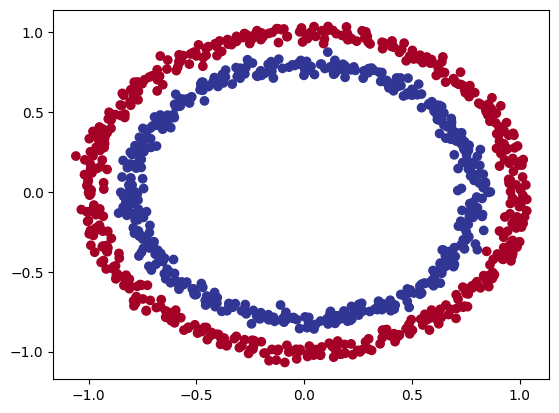

In [ ]:
# visulailze

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

The data we are working with is called a toy dataset. A dataset small enough to experiment on but okay to practice.

### Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print (f"Sample features: {X_sample}")
print (f"Sample label: {y_sample}")

Sample features: [0.75424625 0.23148074]
Sample label: 1


### turn data into tensors and create train and test splits

Default type of numpy is float64
Default type of torch tensor is float32

In [ ]:
# turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) ## changing from float64 to float32
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
# split data into training and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 0.2 means 20% data is test


In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Buiilding a model

1. set up device agnostic code so code will run on GPU if there is one
2. construct a model by subclassing nn.Module
3. Define a loss function and optimizer
4. Create a training and test loop

In [ ]:
# Import PyTorch and nn
import torch
from torch import nn

# Device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

Model :
1. subclassing from nn module
2. Create nn.linear()
3. define a forward() pass
make an instance of model class and send it to target device

In [ ]:
# Construct a model that subclasses nn.Module

class circleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # self.layer_1 = nn.Linear(in_features=2, out_features=5)
    # self.layer_2 = nn.Linear(in_features=5, out_features=1)

    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )

    def forward(self, x):
    #  return self.layer_2(self.layer_1(x))  # x goes into layer 1 and then further into layer2. Optional to specify tensor type
      return two_linear_layers(x)

# Make an instance
model_0 = circleModelV0().to(device)
model_0


circleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [ ]:
device

'cuda'

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# nn.Sequential()  to replicate the above model
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

But the benefit of subclassing is that if you want to customise the forward pass or layers you can use subclassing. But for simpler things we can work with nn.Sequential

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5714,  0.5601],
                      [ 0.2254, -0.1085],
                      [ 0.6717, -0.4065],
                      [-0.5691,  0.2731],
                      [ 0.4480,  0.3680]], device='cuda:0')),
             ('0.bias',
              tensor([-0.1061, -0.5977,  0.1852,  0.5040,  0.4072], device='cuda:0')),
             ('1.weight',
              tensor([[-0.4422,  0.0360, -0.2235,  0.4351,  0.3122]], device='cuda:0')),
             ('1.bias', tensor([-0.0552], device='cuda:0'))])

In [ ]:
# Make Predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}")
print(f"Shape of predictions: {untrained_preds.shape}")
print(f"First 10 predictions: {untrained_preds[:10]}")
print(f"Length of test samples: {len(X_test)}")
print(f"Shape of test samples: {X_test.shape}")
print(f"First 10 labels: {X_test[:10]}")



Length of predictions: 200
Shape of predictions: torch.Size([200, 1])
First 10 predictions: tensor([[ 0.5136],
        [ 0.3376],
        [ 0.6054],
        [ 0.4891],
        [ 0.0187],
        [-0.0842],
        [-0.1148],
        [-0.2150],
        [ 0.6300],
        [ 0.3193]], device='cuda:0')
Length of test samples: 200
Shape of test samples: torch.Size([200, 2])
First 10 labels: tensor([[-0.3752,  0.6827],
        [ 0.0154,  0.9600],
        [-0.7028, -0.3147],
        [-0.2853,  0.9664],
        [ 0.4024, -0.7438],
        [ 0.6323, -0.5711],
        [ 0.8561,  0.5499],
        [ 1.0034,  0.1903],
        [-0.7489, -0.2951],
        [ 0.0538,  0.9739]])


In [ ]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### Setup loss function and optimizer

Which loss functin or optimizer should you use?

Depends on problem

For regression we might want MAE or MSE

For classification we might want cross entropy function

logit : logit layer is the layer that feeds into the softmax layer that further outputs probabilites

Optimizer :  Most common and useful are SGD and Adam. `torch.optim` to look into more cost functions

loss function we will use is `torch.nn.BECWithLogitsLoss()`

In [ ]:
# Setup loss function

# loss_fn = nn.BCELoss()  # BCE loss requires for the input to have gone through the sigmoid activation function
# nn.Sequential (
#     nn.Sigmoid(),
#     nn.BCELoss()
# ) this is the same as using the bcewithlogitloss. But the below function gives us numeric stability
loss_fn = nn.BCEWithLogitsLoss()

# Setup optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [ ]:
# Calculate accuracy (Out of 100 examples what percentage does our model get right)
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

## Train model

To train model we need a training loop

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward(backpropagation)
5. Optimizer step (Gradient descent)

###  Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**

We can convert these logits into prediction probabilities by passing them to some kind of activation function (for example sigmoid for binary cross entropy and softmax for multiclass classification)

Then we can convert probabilities into prediction labels by rounding them or taking the argmax()


In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits # The modes only make sure that no gradients are being tracked

tensor([[0.5136],
        [0.3376],
        [0.6054],
        [0.4891],
        [0.0187]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6256],
        [0.5836],
        [0.6469],
        [0.6199],
        [0.5047]], device='cuda:0')

In [ ]:
# for prediction probability values we need to perform rounding on them

# Find the predicted labels
y_preds = torch.round(y_pred_probs)
y_preds

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
y_pred_labels

# check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze() == y_pred_labels.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([True, True, True, True, True], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### Building a training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. calculate loss/accuracy
    loss = loss_fn(torch.sigmoid(y_logits), y_train)
    loss = loss_fn(y_logits, y_train) # expects logits as input where as bceloss expects prediction prob. as input
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)


# Optimizer zero grad

    optimizer.zero_grad()

  # Loss backward
    loss.backward()

  # Optimizer step
    optimizer.step()


### testing
    model_0.eval()
    with torch.inference_mode():
      # forward pass
      test_logits = model_0(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))

      # Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)


      # Print out whats happening
      if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.71634 | Accuracy: 51.62% | Test Loss: 0.70973 | Test Accuracy: 55.50%
Epoch: 10 | Loss: 0.70514 | Accuracy: 50.38% | Test Loss: 0.70060 | Test Accuracy: 56.50%
Epoch: 20 | Loss: 0.70028 | Accuracy: 50.38% | Test Loss: 0.69697 | Test Accuracy: 53.00%
Epoch: 30 | Loss: 0.69777 | Accuracy: 50.38% | Test Loss: 0.69533 | Test Accuracy: 51.50%
Epoch: 40 | Loss: 0.69628 | Accuracy: 50.38% | Test Loss: 0.69453 | Test Accuracy: 49.50%
Epoch: 50 | Loss: 0.69531 | Accuracy: 50.38% | Test Loss: 0.69411 | Test Accuracy: 47.50%
Epoch: 60 | Loss: 0.69465 | Accuracy: 50.25% | Test Loss: 0.69391 | Test Accuracy: 49.00%
Epoch: 70 | Loss: 0.69418 | Accuracy: 50.12% | Test Loss: 0.69383 | Test Accuracy: 51.00%
Epoch: 80 | Loss: 0.69385 | Accuracy: 49.88% | Test Loss: 0.69382 | Test Accuracy: 51.50%
Epoch: 90 | Loss: 0.69361 | Accuracy: 49.62% | Test Loss: 0.69386 | Test Accuracy: 54.00%


## Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything...

visualise

Importing a function called `plot_decision_boundary`

In [ ]:
import requests
from pathlib import Path

# download helper functions form learn pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_decision_boundary, plot_predictions

Text(0.5, 1.0, 'Train')

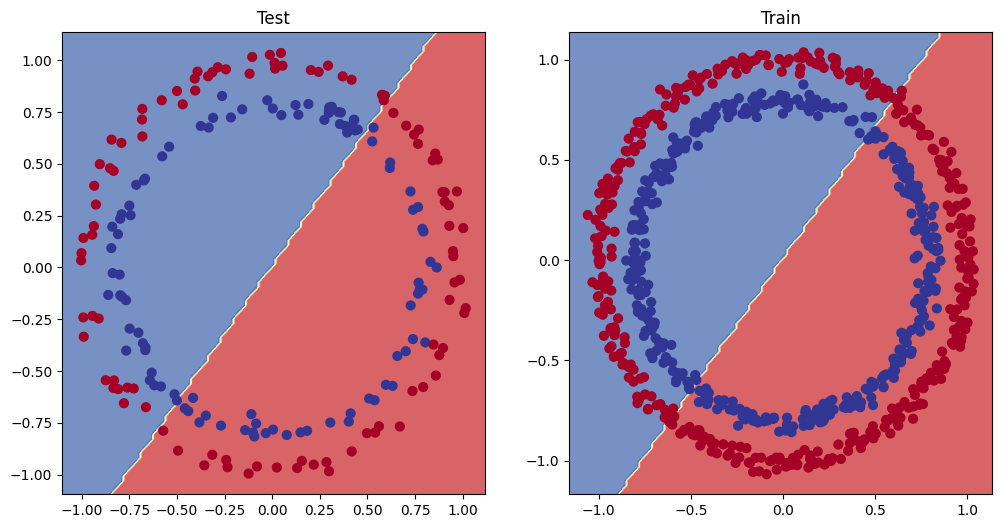

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_0, X_test, y_test)
plt.title("Test")
plt.subplot(1, 2, 2)
plot_decision_boundary(model_0, X_train, y_train)
plt.title("Train")

### Improving a model

1. Add more layers (give the model more chances to learn the patterns in the data)
2. Add more hidden units or neurons
3. Fit for longer (more epochs)
4. Changing the activation functions
5. Change the learning rate
6. change the loss function


These options are from a model's perspective because they deal with model and not data. All these options are called hyperparameters

another is data perspective

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    return z

    # or return self.layer_3(self.layer_2(sels.layer_1(x))) This leverages speed up behind the scenes

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [ ]:
# training and testing loops
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_1.train()

    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. calculate loss/accuracy
    loss = loss_fn(torch.sigmoid(y_logits), y_train)
    loss = loss_fn(y_logits, y_train) # expects logits as input where as bceloss expects prediction prob. as input
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)


# Optimizer zero grad

    optimizer.zero_grad()

  # Loss backward
    loss.backward()

  # Optimizer step
    optimizer.step()


### testing
    model_1.eval()
    with torch.inference_mode():
      # forward pass
      test_logits = model_1(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))

      # Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)


      # Print out whats happening
      if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396 | Accuracy: 50.88% | Test Loss: 0.69261 | Test Accuracy: 51.00%
Epoch: 10 | Loss: 0.69369 | Accuracy: 50.25% | Test Loss: 0.69270 | Test Accuracy: 50.00%
Epoch: 20 | Loss: 0.69351 | Accuracy: 50.12% | Test Loss: 0.69283 | Test Accuracy: 49.50%
Epoch: 30 | Loss: 0.69339 | Accuracy: 50.50% | Test Loss: 0.69297 | Test Accuracy: 48.00%
Epoch: 40 | Loss: 0.69329 | Accuracy: 50.38% | Test Loss: 0.69310 | Test Accuracy: 49.00%
Epoch: 50 | Loss: 0.69322 | Accuracy: 49.88% | Test Loss: 0.69324 | Test Accuracy: 50.00%
Epoch: 60 | Loss: 0.69317 | Accuracy: 49.38% | Test Loss: 0.69336 | Test Accuracy: 51.50%
Epoch: 70 | Loss: 0.69312 | Accuracy: 49.38% | Test Loss: 0.69348 | Test Accuracy: 50.50%
Epoch: 80 | Loss: 0.69309 | Accuracy: 50.12% | Test Loss: 0.69359 | Test Accuracy: 50.00%
Epoch: 90 | Loss: 0.69307 | Accuracy: 50.50% | Test Loss: 0.69370 | Test Accuracy: 48.50%
Epoch: 100 | Loss: 0.69305 | Accuracy: 50.38% | Test Loss: 0.69379 | Test Accuracy: 48.00%
Epoch: 110

Text(0.5, 1.0, 'Train')

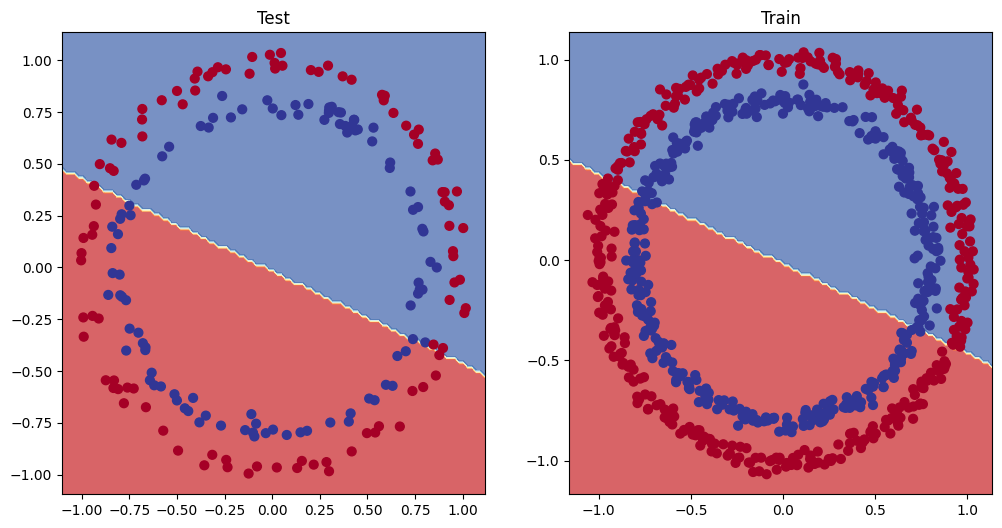

In [ ]:
# Model still acts like a coin toss. like its randomly guessing
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_1, X_test, y_test)
plt.title("Test")
plt.subplot(1, 2, 2)
plot_decision_boundary(model_1, X_train, y_train)
plt.title("Train")

### Preparing data to see if our model can fit a straight line

One way to troubleshoot a larger problem is to test out a smaller problem

In [ ]:
import torch
# Create some data
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

X_regression[:10], y_regression[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Create train and test splits

train_split = int(0.8 * len(X_regression))
X_train, y_train = X_regression[:train_split], y_regression[:train_split]
X_test, y_test = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

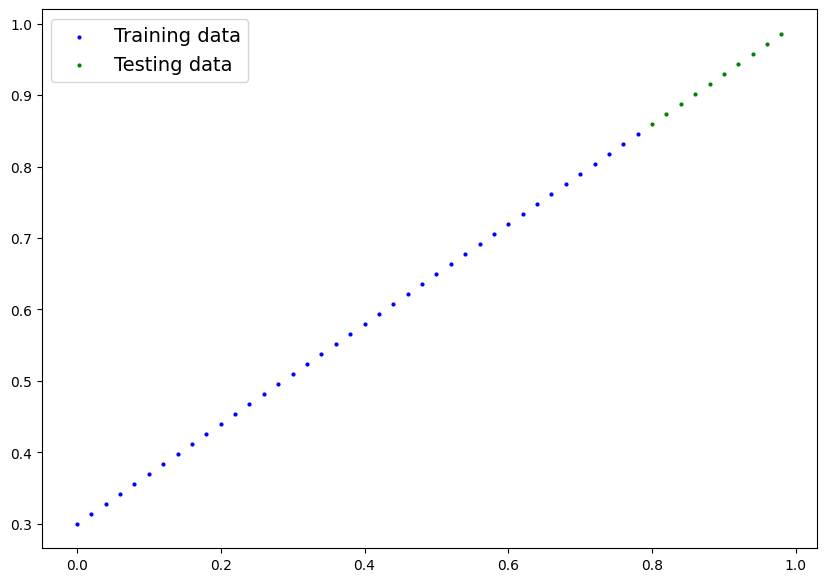

In [ ]:
def plot_predictions(train_data=X_train, train_label=y_train, test_data=X_test, test_label=y_test, predictions=None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7)) # like creating a blank canvas

  # Plot training data in blue
  plt.scatter(train_data, train_label, c="b", s=4, label="Training data") # s is size of the dots in the plot

  # Plot test data in green
  plt.scatter(test_data, test_label, c="g", s=4,label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exit
    plt.scatter(test_data, predictions, c="r",s=4, label="Predictions") # We evaluate how good are the predictions of our model in comparison to y_test

  # Show the legend
  plt.legend(prop={"size" : 14}) # legend is label for lines, points etc

plot_predictions(train_data=X_train, train_label = y_train, test_data=X_test, test_label=y_test )